# 读取数据

In [1]:
# 挂载google drive 更改工作目录到Google硬盘
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "drive/MyDrive"

Mounted at /content/drive
'Colab Notebooks'   Working


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score
from sklearn import linear_model
import lightgbm as lgb
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [20]:
movie = pd.read_csv('drive/MyDrive/Working/input/movie_metadata.csv') # reads the csv and creates the dataframe called movie
movie.head()
# DataFrame打印所有行
pd.set_option('display.max_rows',None)

# 数据理解

In [ ]:
movie.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,The Fast and the Furious,Steve Coogan,based on novel,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


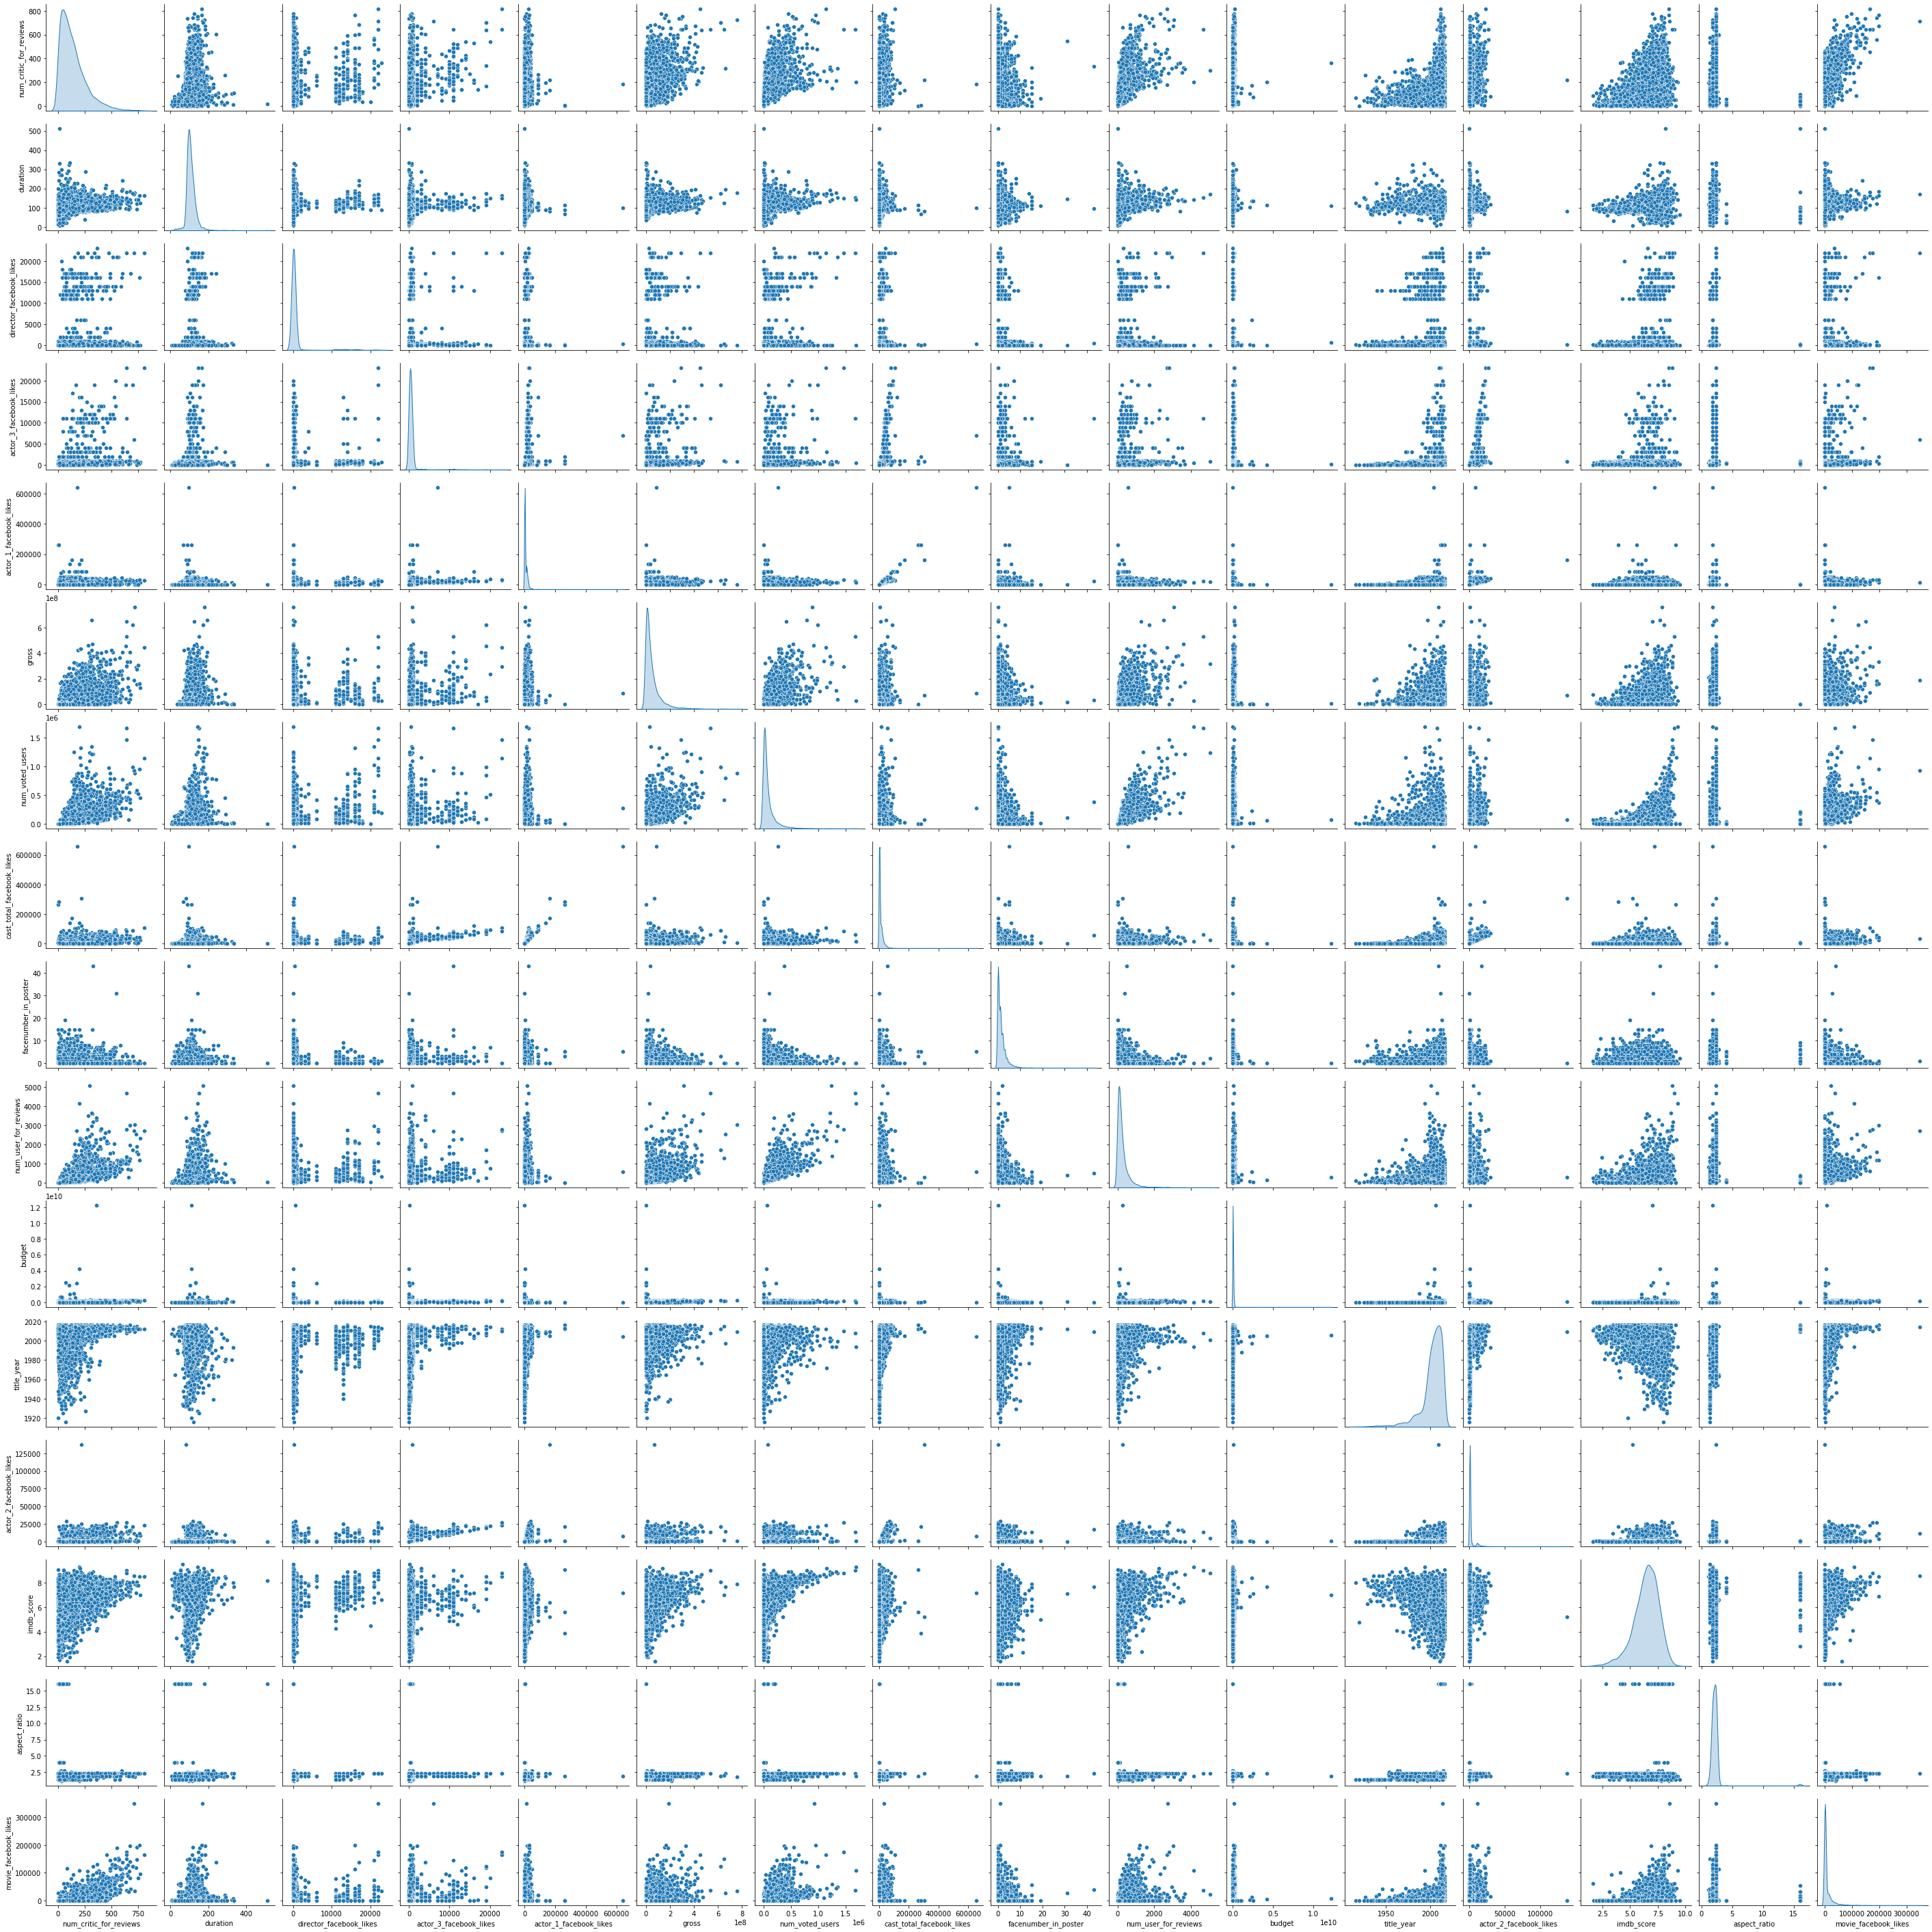

In [ ]:
sns.pairplot(data=movie,diag_kind='kde')

<AxesSubplot:ylabel='color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes'>

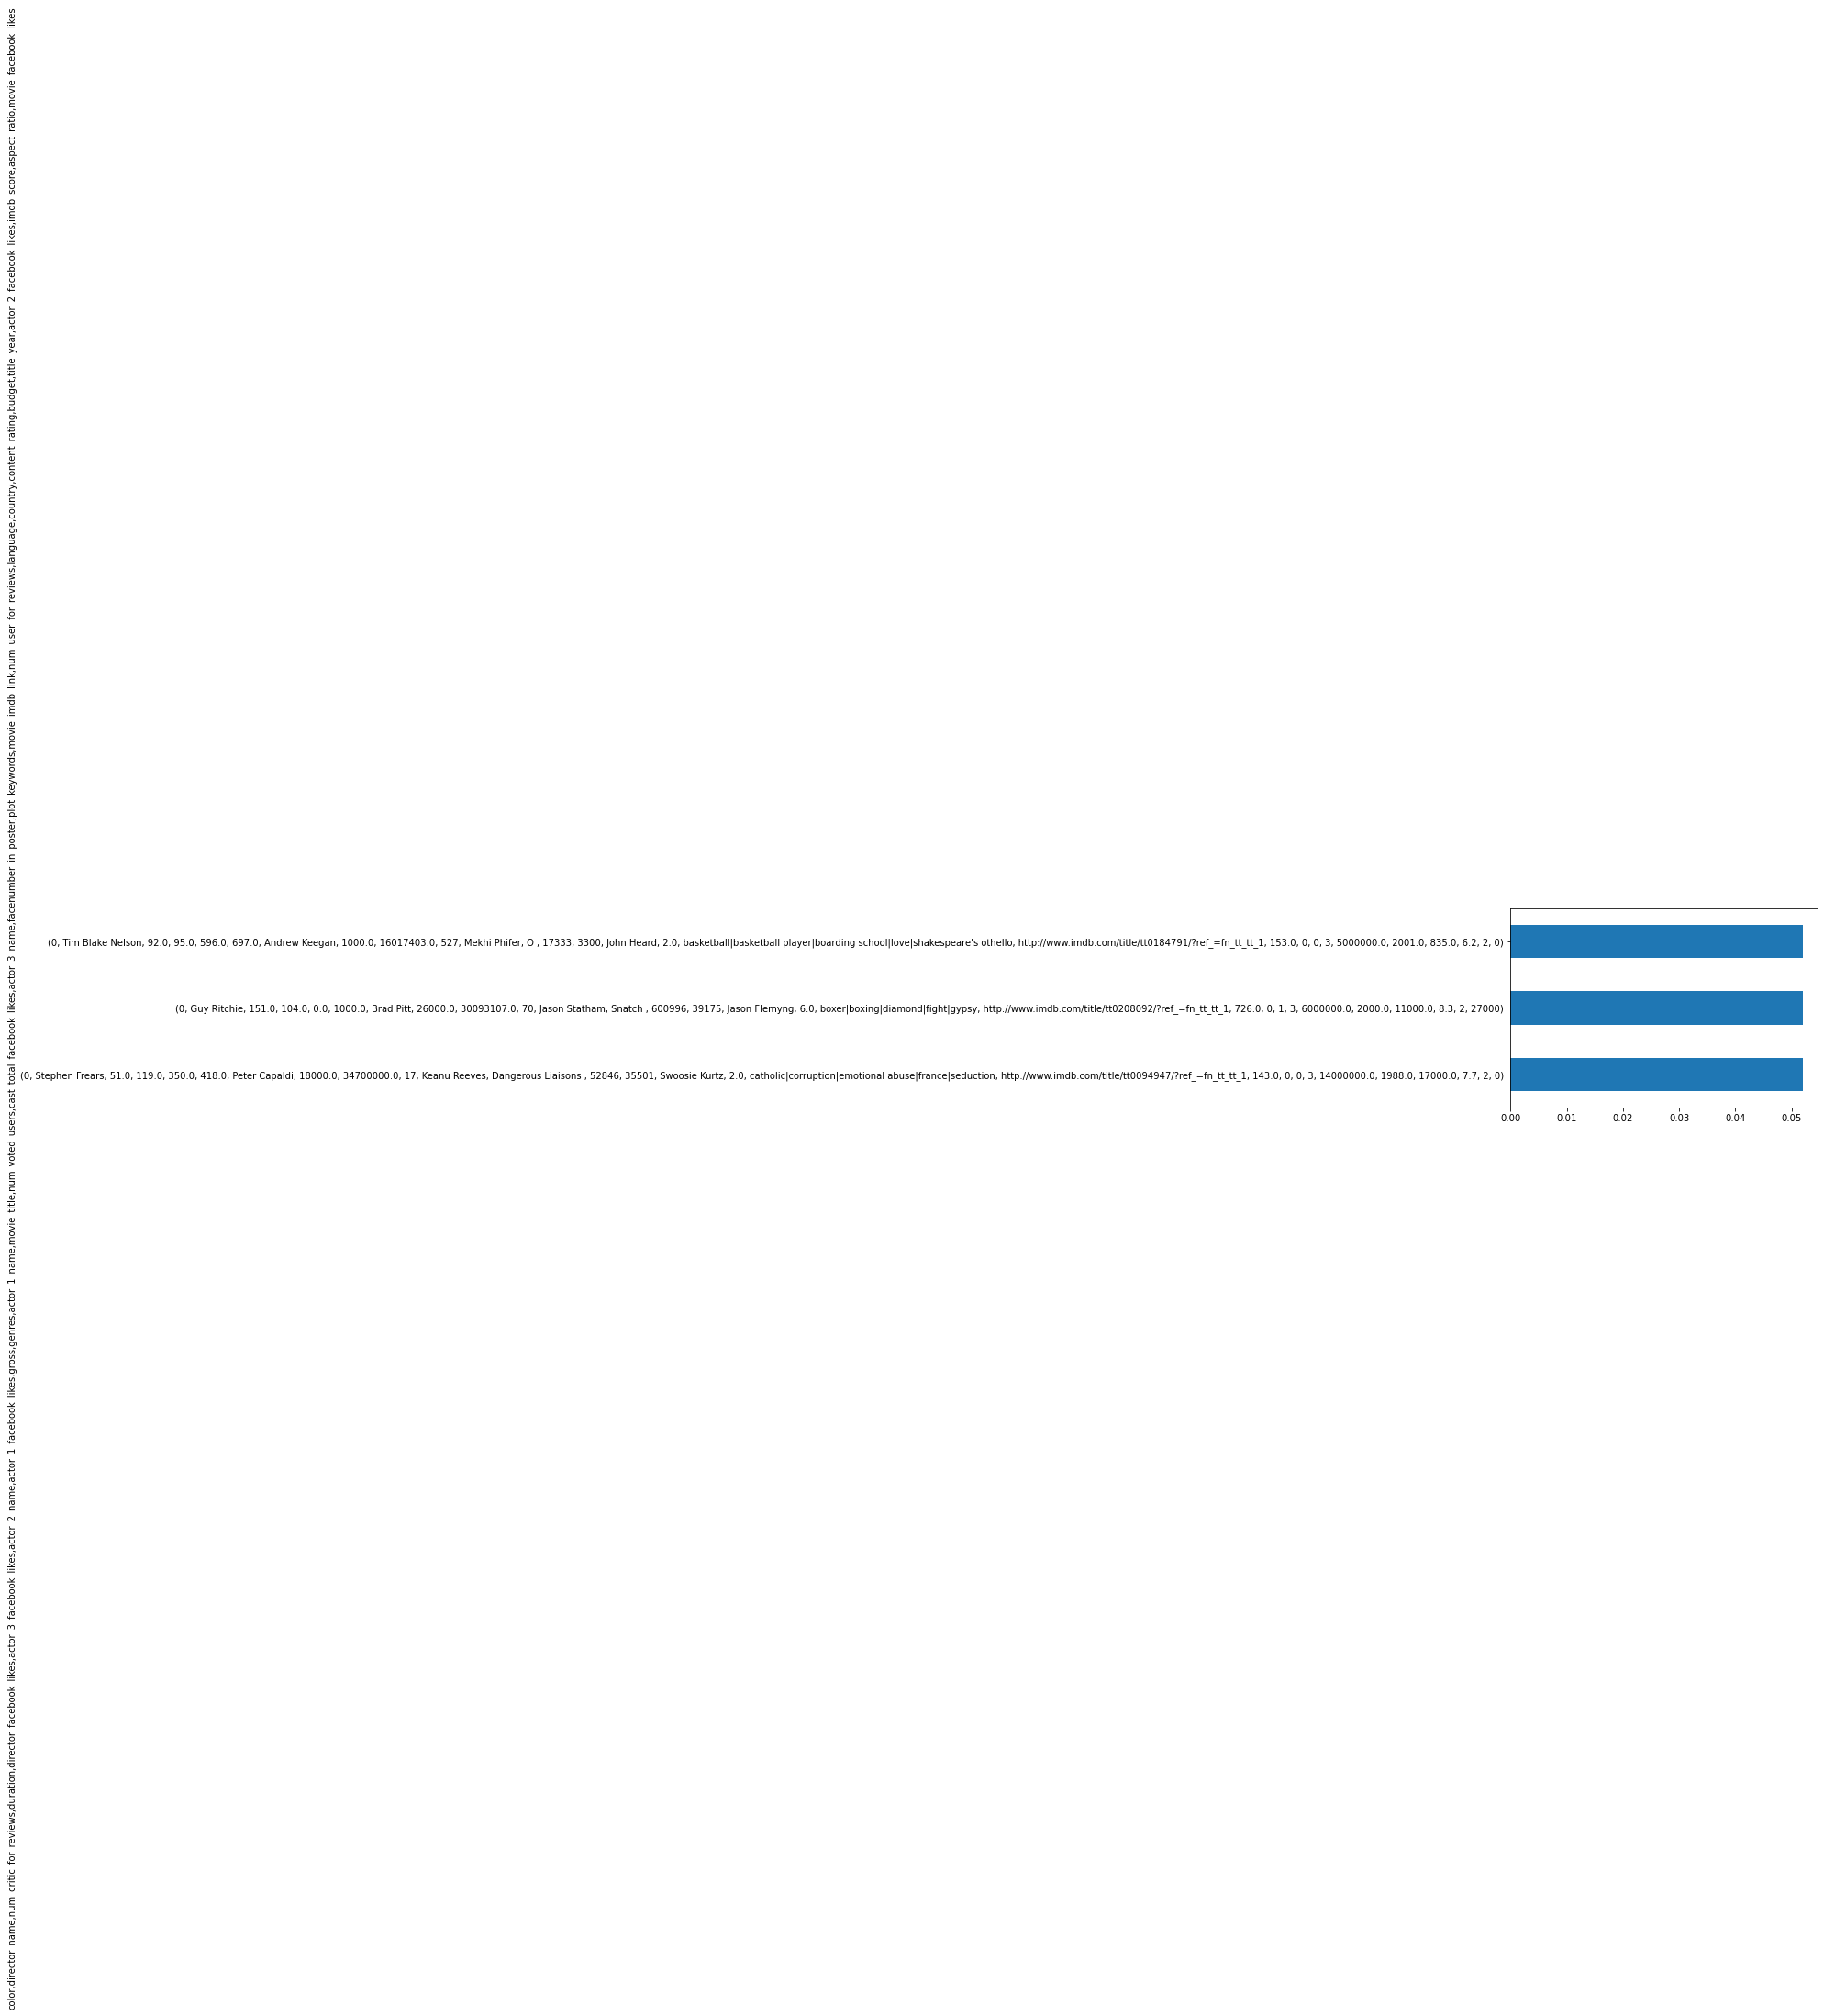

In [ ]:
(movie.value_counts(normalize=True)[:3]*100).plot.barh()

# 数据预处理

## 删除重复数据
行数：5043——>4998

In [21]:
# 重复的数据个数
print(np.sum(movie.duplicated()))
# 删除重复数据
movie = movie.drop_duplicates()

45


## 删除电影名末尾的空格

In [22]:
movie['movie_title'] = movie['movie_title'].str.strip()

## 缺失值的删除和填补

### 缺失值的可视化

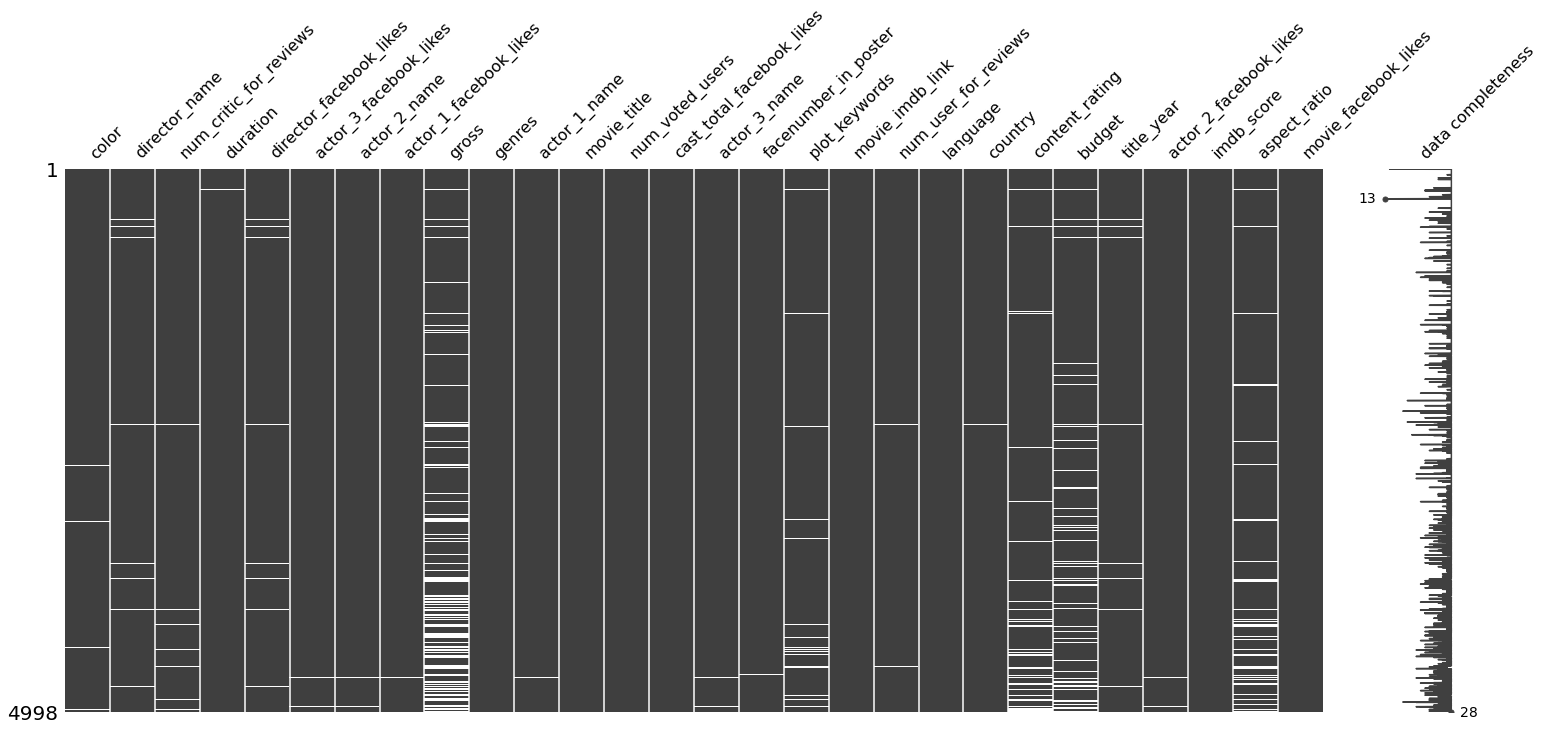

In [ ]:
msno.matrix(movie, labels=True)

                      index  missNum  missRate
8                     gross      874  0.174870
22                   budget      487  0.097439
26             aspect_ratio      327  0.065426
21           content_rating      301  0.060224
16            plot_keywords      152  0.030412
23               title_year      107  0.021409
1             director_name      103  0.020608
4   director_facebook_likes      103  0.020608
2    num_critic_for_reviews       49  0.009804
14             actor_3_name       23  0.004602
5    actor_3_facebook_likes       23  0.004602
18     num_user_for_reviews       21  0.004202
0                     color       19  0.003802
3                  duration       15  0.003001
15     facenumber_in_poster       13  0.002601
6              actor_2_name       13  0.002601
24   actor_2_facebook_likes       13  0.002601
19                 language       12  0.002401
10             actor_1_name        7  0.001401
7    actor_1_facebook_likes        7  0.001401
20           

<AxesSubplot:>

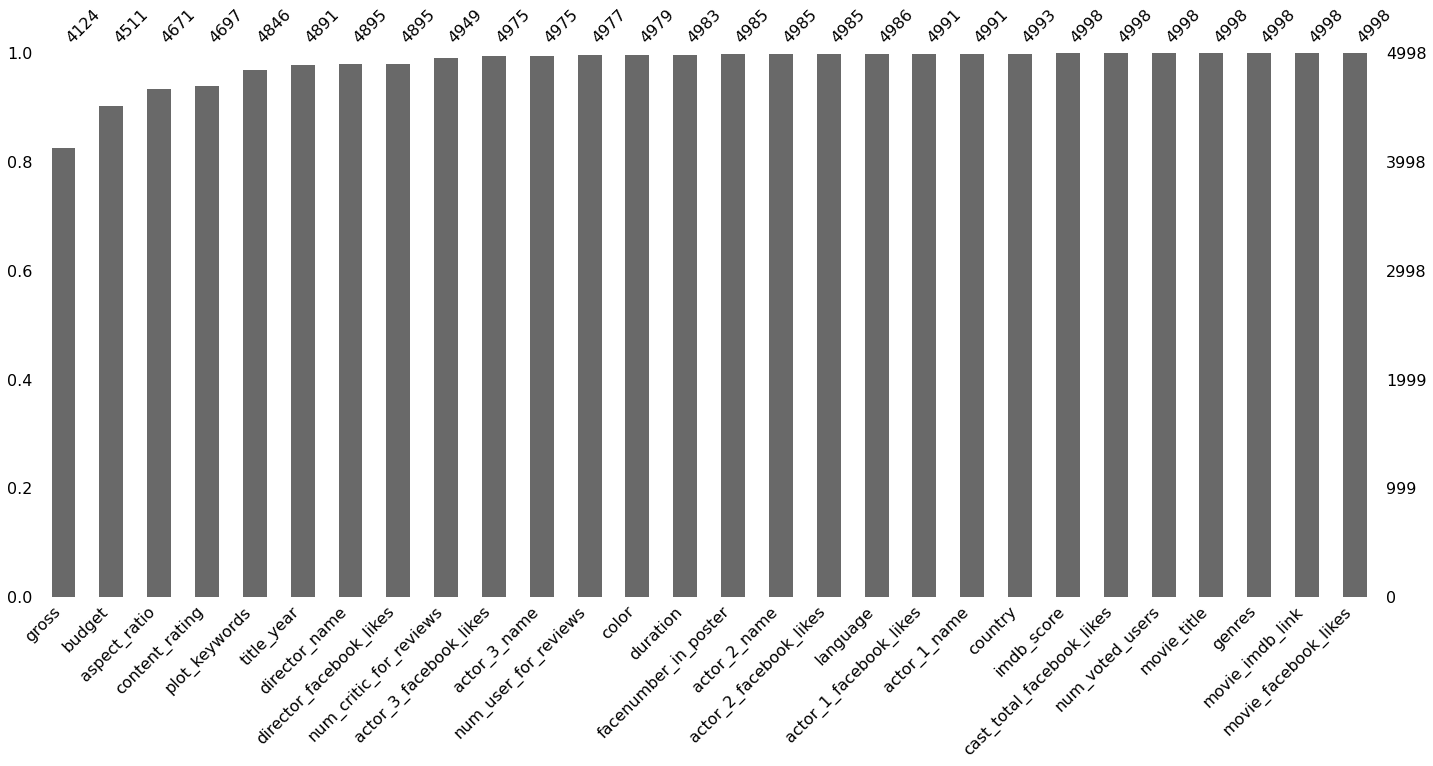

In [ ]:
missing = movie.isnull().sum().reset_index().rename(columns={0:'missNum'})
missing['missRate']=missing['missNum']/movie.shape[0]
miss_analy=missing[missing.missRate>0].sort_values(by='missRate', ascending=False)
print(miss_analy)
msno.bar(movie, sort='ascending')

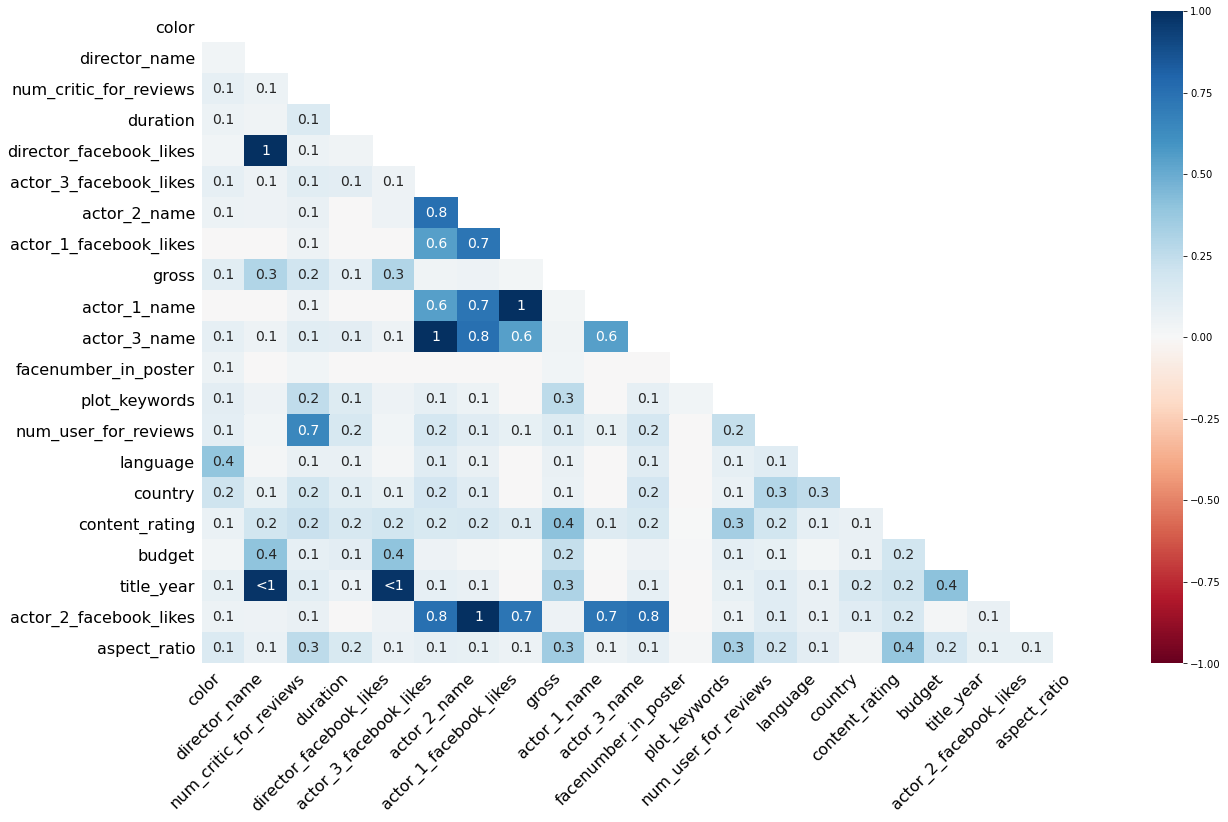

In [ ]:
msno.heatmap(movie)

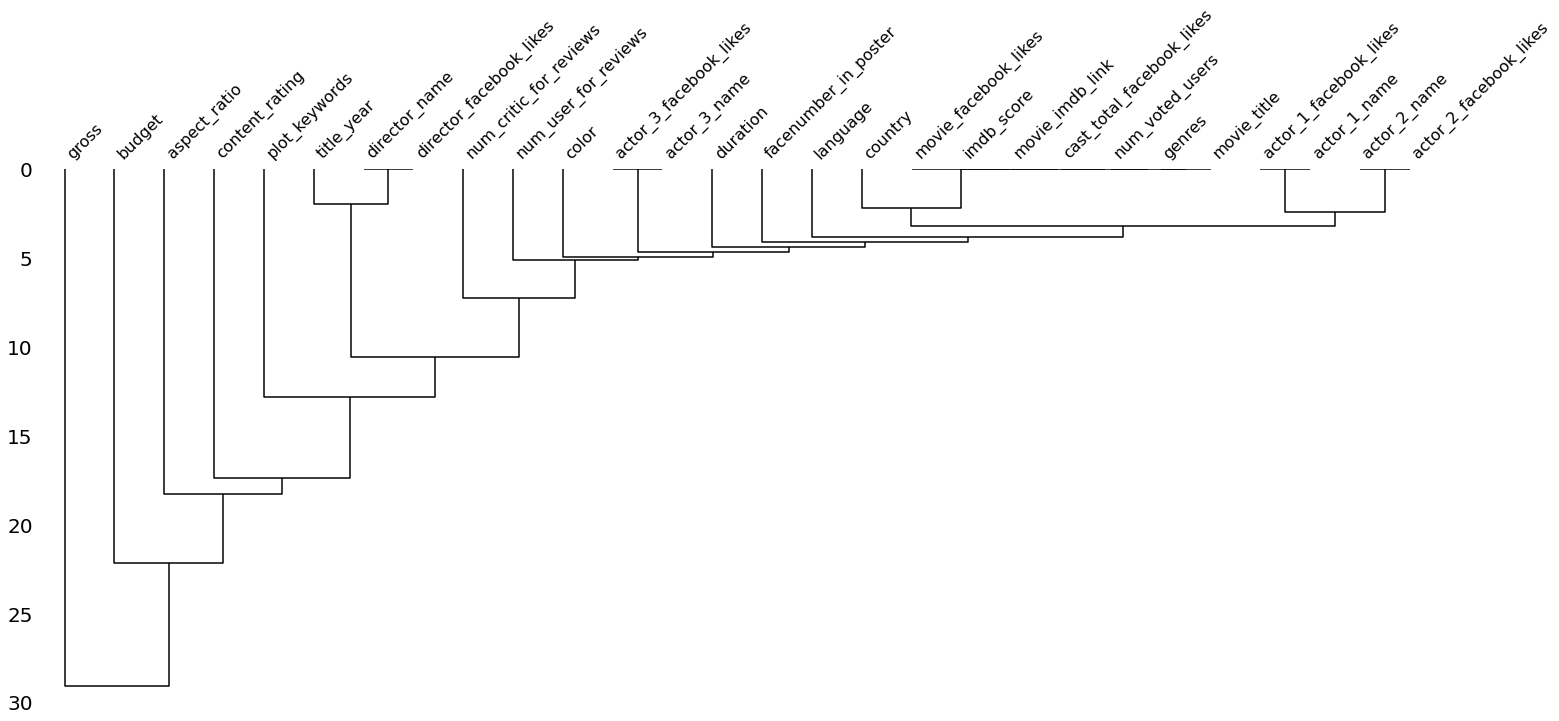

In [ ]:
msno.dendrogram(movie)

## 特征值转为数字
类别特征，将字符转为数值

In [23]:
cat_cols = ['genres',
            # 'color',
            # 'language',
            # 'country',
            'content_rating','aspect_ratio']
for cat in cat_cols:
    movie[cat] = pd.factorize(movie[cat])[0].astype(np.uint16)

## 缺失值插补

### 对于缺失的gross budget，较难估算
1. 删除缺失的行
2. 填0
3. 填均值/中位数

4998——>3857

In [ ]:
movie = movie.dropna(subset=[
#     "gross",
    "budget"
])

### 其他连续型变量
fillna
填均值
中位数

In [24]:
# aspect_ratio 画面比例 0——>NAN——>均值
mean_0_col_list=[
#                 'num_critic_for_reviews',
                 'duration',
                 'director_facebook_likes',
                 'actor_3_facebook_likes',
                 'actor_1_facebook_likes',
                 'cast_total_facebook_likes',
                 'actor_2_facebook_likes',
                 'movie_facebook_likes',
#                  'num_user_for_reviews',
                 'title_year',
                'budget',
                 'duration'
                ]
for column_0 in mean_0_col_list:
    movie[column_0].replace(0, np.nan, inplace=True)
# aspect_ratio 画面比例 NAN——>均值
mean_col_list=mean_0_col_list
median_col_list=['aspect_ratio','content_rating',
                #  'color',
                 'facenumber_in_poster',
                #  'language'
                 ]
# mean_col_list.extend(mean_0_col_list)
for column in mean_col_list:
    mean_val = movie[column].mean()
    movie[column].fillna(mean_val, inplace=True)
for column in median_col_list:
    median_val = movie[column].median()
    movie[column].fillna(median_val, inplace=True)

# 特征工程

## 删除冗余特征

In [25]:
redundant_col = [
    'director_name','actor_1_name','actor_2_name','actor_3_name',
                    'movie_title','plot_keywords','movie_imdb_link',
#                      'facenumber_in_poster',
#                      'genres','aspect_ratio','content_rating',
                    'language','country','color',
                     'gross','num_voted_users','num_user_for_reviews','num_critic_for_reviews', 
#                      'duration','movie_facebook_likes',                
                ]
movie=movie.drop(columns=redundant_col)

In [162]:
movie.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,cast_total_facebook_likes,facenumber_in_poster,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,178.000000,843.192596,855.000000,1000.0,0,4834.0,0.0,0,2.370000e+08,2009.00000,936.0,0,33000.000000
1,169.000000,563.000000,1000.000000,40000.0,1,48350.0,0.0,0,3.000000e+08,2007.00000,5000.0,1,13195.407616
2,148.000000,843.192596,161.000000,11000.0,2,11700.0,1.0,0,2.450000e+08,2015.00000,393.0,1,85000.000000
3,164.000000,22000.000000,23000.000000,27000.0,3,106759.0,0.0,0,2.500000e+08,2012.00000,23000.0,1,164000.000000
4,107.213325,131.000000,651.556897,131.0,4,143.0,0.0,65535,3.974787e+07,2002.46882,12.0,65535,13195.407616


## 特征编码 One-*Hot*

In [67]:
# 对分类特征进行One-Hot编码
def oneHotEncode(df,colNames):
    for col in colNames:
        # if( df[col].dtype == np.dtype('object')):
            # pandas.get_dummies 可以对分类特征进行One-Hot编码
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            # drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
movie_Encoding=oneHotEncode(movie,cat_cols)

In [133]:
movie.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,cast_total_facebook_likes,facenumber_in_poster,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,178.000000,843.192596,855.000000,1000.0,0,4834.0,0.0,0,2.370000e+08,2009.00000,936.0,7.9,0,33000.000000
1,169.000000,563.000000,1000.000000,40000.0,1,48350.0,0.0,0,3.000000e+08,2007.00000,5000.0,7.1,1,13195.407616
2,148.000000,843.192596,161.000000,11000.0,2,11700.0,1.0,0,2.450000e+08,2015.00000,393.0,6.8,1,85000.000000
3,164.000000,22000.000000,23000.000000,27000.0,3,106759.0,0.0,0,2.500000e+08,2012.00000,23000.0,8.5,1,164000.000000
4,107.213325,131.000000,651.556897,131.0,4,143.0,0.0,65535,3.974787e+07,2002.46882,12.0,7.1,65535,13195.407616


## 特征编码 Target-Encoding

In [11]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.7MB/s 


In [12]:
from category_encoders.target_encoder import TargetEncoder
encoder = TargetEncoder(cols=cat_cols, 
                        handle_unknown='value',  
                        handle_missing='value').fit(train_X_orgin,train_y) # 在训练集上训练
encoded_train = encoder.transform(train_X_orgin) # 转换训练集
encoded_test = encoder.transform(test_X_orgin) # 转换测试集

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
train_X_orgin=encoded_train
test_X_orgin=encoded_test

In [68]:
movie = movie_Encoding

## 数据标准化

In [26]:
target = movie['imdb_score']
movie.drop(['imdb_score'],axis=1,inplace=True)
data = movie

In [167]:
data.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,genres_0,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,genres_7,genres_8,genres_9,genres_10,genres_11,genres_12,genres_13,genres_14,genres_15,genres_16,genres_17,genres_18,genres_19,genres_20,genres_21,genres_22,genres_23,genres_24,genres_25,genres_26,genres_27,genres_28,genres_29,...,content_rating_2,content_rating_3,content_rating_4,content_rating_5,content_rating_6,content_rating_7,content_rating_8,content_rating_9,content_rating_10,content_rating_11,content_rating_12,content_rating_13,content_rating_14,content_rating_15,content_rating_16,content_rating_17,content_rating_65535,aspect_ratio_0,aspect_ratio_1,aspect_ratio_2,aspect_ratio_3,aspect_ratio_4,aspect_ratio_5,aspect_ratio_6,aspect_ratio_7,aspect_ratio_8,aspect_ratio_9,aspect_ratio_10,aspect_ratio_11,aspect_ratio_12,aspect_ratio_13,aspect_ratio_14,aspect_ratio_15,aspect_ratio_16,aspect_ratio_17,aspect_ratio_18,aspect_ratio_19,aspect_ratio_20,aspect_ratio_21,aspect_ratio_65535
0,178.000000,843.192596,855.000000,1000.0,4834.0,0.0,2.370000e+08,2009.00000,936.0,33000.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,169.000000,563.000000,1000.000000,40000.0,48350.0,0.0,3.000000e+08,2007.00000,5000.0,13195.407616,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,148.000000,843.192596,161.000000,11000.0,11700.0,1.0,2.450000e+08,2015.00000,393.0,85000.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,164.000000,22000.000000,23000.000000,27000.0,106759.0,0.0,2.500000e+08,2012.00000,23000.0,164000.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,107.213325,131.000000,651.556897,131.0,143.0,0.0,3.974787e+07,2002.46882,12.0,13195.407616,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
train_X_orgin,test_X_orgin,train_y,test_y = train_test_split(data,target,test_size=0.2,random_state=5)

In [47]:
train_X=StandardScaler().fit_transform(train_X_orgin)
test_X=StandardScaler().fit_transform(test_X_orgin)

In [ ]:
train_X = (train_X_orgin-train_X_orgin.mean())/(train_X_orgin.std())
test_X = (test_X_orgin-test_X_orgin.mean())/(test_X_orgin.std())

In [14]:
train_X=MinMaxScaler().fit_transform(train_X_orgin)
test_X=MinMaxScaler().fit_transform(test_X_orgin)

In [140]:
train_X = train_X_orgin.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))) 
test_X = test_X_orgin.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))) 

In [28]:
train_X=train_X_orgin
test_X=test_X_orgin

## 选择特征

### random forest

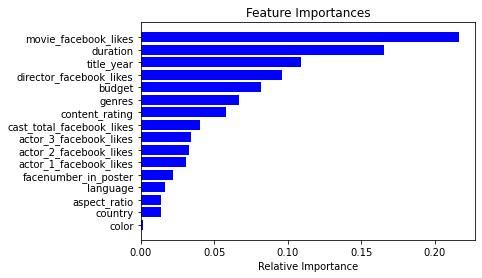

In [ ]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(train_X,np.array(train_y))
features = train_X.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:16])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Lasso 选择特征

Lasso model: 0.267 * movie_facebook_likes + -0.205 * title_year + 0.159 * duration + 0.064 * director_facebook_likes + 0.048 * aspect_ratio + 0.036 * content_rating + -0.021 * facenumber_in_poster + 0.0 * color + -0.0 * actor_3_facebook_likes + 0.0 * actor_1_facebook_likes + -0.0 * genres + 0.0 * cast_total_facebook_likes + 0.0 * language + 0.0 * country + 0.0 * budget + 0.0 * actor_2_facebook_likes


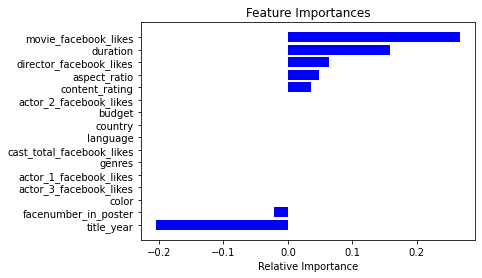

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(train_X)
Y = train_y
names = train_X.columns

lasso = Lasso(alpha=0.05)
lasso.fit(X, Y)
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names.all() == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
print ('Lasso model: '+ pretty_print_linear(lasso.coef_, names, sort = True))

importances = lasso.coef_
indices = np.argsort(importances[0:16])
pretty_print_linear_1(importances, indices)
def pretty_print_linear_1(importances, indices):
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Coefficient')
    plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


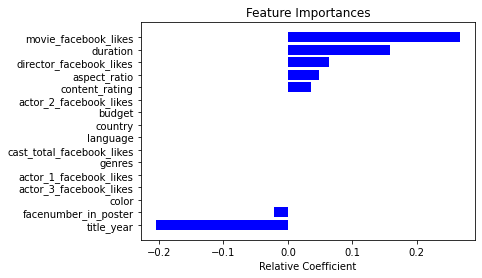

Lasso model: 0.267 * movie_facebook_likes + -0.205 * title_year + 0.159 * duration + 0.064 * director_facebook_likes + 0.048 * aspect_ratio + 0.036 * content_rating + -0.021 * facenumber_in_poster + 0.0 * color + -0.0 * actor_3_facebook_likes + 0.0 * actor_1_facebook_likes + -0.0 * genres + 0.0 * cast_total_facebook_likes + 0.0 * language + 0.0 * country + 0.0 * budget + 0.0 * actor_2_facebook_likes


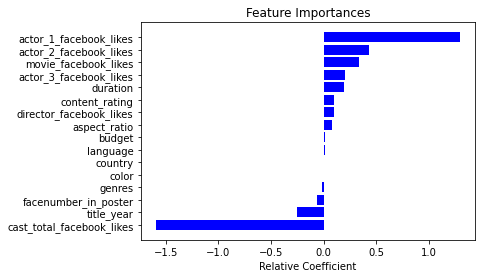

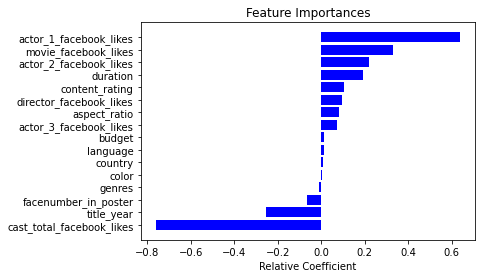

In [ ]:
# size = 100

#We run the method 10 times with different random seeds
for i in range(50):
#     print "Random seed %s" % i
#     np.random.seed(seed=i)
#     X_seed = np.random.normal(0, 1, size)
#     X1 = X_seed + np.random.normal(0, .1, size)
#     X2 = X_seed + np.random.normal(0, .1, size)
#     X3 = X_seed + np.random.normal(0, .1, size)
#     Y = X1 + X2 + X3 + np.random.normal(0, 1, size)
#     X = np.array([X1, X2, X3]).T
    print (i)
    lasso = Lasso(alpha=0.05)
    lasso.fit(X, Y)
#     pretty_print_linear_1(lasso.coef_,np.argsort(lasso.coef_[0:16]))
#     print ('Lasso model: '+ pretty_print_linear(lasso.coef_, names, sort = True))
    
    lr = LinearRegression()
    lr.fit(X,Y)
#     pretty_print_linear_1(lr.coef_,np.argsort(lr.coef_[0:16]))

    ridge = Ridge(alpha=10)
    ridge.fit(X,Y)
#     pretty_print_linear_1(ridge.coef_,np.argsort(ridge.coef_[0:16]))

pretty_print_linear_1(lasso.coef_,np.argsort(lasso.coef_[0:16]))
print ('Lasso model: '+ pretty_print_linear(lasso.coef_, names, sort = True))
pretty_print_linear_1(lr.coef_,np.argsort(lr.coef_[0:16]))
pretty_print_linear_1(ridge.coef_,np.argsort(ridge.coef_[0:16]))

## 特征降维

### 1. PCA

Text(0, 0.5, 'Cumulative explained variance')

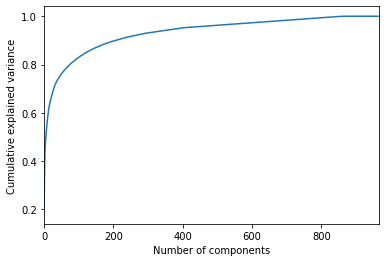

In [72]:
pca = PCA().fit(train_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,966,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [73]:
sklearn_pca=PCA(n_components=600)
train_X=sklearn_pca.fit_transform(train_X)
test_X=sklearn_pca.transform(test_X)

In [74]:
train_X.shape

(3998, 600)

### 2. FastICA

In [97]:
ica = FastICA().fit(train_X)
plt.plot(np.cumsum(ica.explained_variance_ratio_))
plt.xlim(0,965,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

KeyboardInterrupt: ignored

In [51]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=850, random_state=12) 
train_X=ICA.fit_transform(train_X)
test_X=ICA.transform(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [53]:
train_X.shape

(3998, 850)

### 降维后的图

In [ ]:
# plt.scatter(train_X[:, 0], train_X[:, 1],marker='o',c=train_y)
plt.figure(figsize=(12,8))
plt.scatter(train_X[:, 0], train_X[:, 1]）
plt.scatter(train_X[:, 1], train_X[:, 2]）
plt.scatter(train_X[:, 2], train_X[:, 3]）
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-585-46c7cceef3ab>, line 3)

D:\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:468: UserWarning: n_components is too large: it will be set to 5
  warnings.warn(


(-2.0, 2.0)

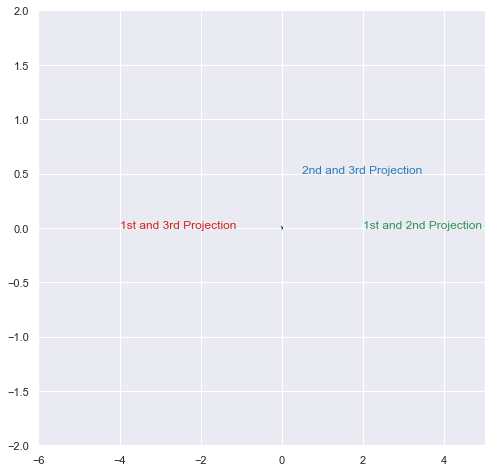

In [ ]:
sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))

ax = sns.kdeplot(train_X[:,0], train_X[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(train_X[:,1], train_X[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(train_X[:,2], train_X[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

# 建模

## LGB

In [29]:
# LGB模型五折、不同种子求平均

train_X[cat_cols] = train_X[cat_cols].astype('category')
test_X[cat_cols] = test_X[cat_cols].astype('category')
train_set = train_X
test_set = test_X
predictions_lgb = np.zeros((len(test_set)))
params = {
          'metric':'mean_squared_error',
          'num_iterations': 3000
}
seeds = [1,5,10]
for seed in seeds:
    oof_lgb = np.zeros(len(train_set))
    n_splits = 10
    KF = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for fold_, (trn_idx, val_idx) in enumerate(KF.split(train_set, train_y)):
        print("fold n°{}".format(fold_))
        val_data = lgb.Dataset(train_set.iloc[val_idx],label=np.array(train_y)[val_idx])
        trn_data = lgb.Dataset(train_set.iloc[trn_idx],label=np.array(train_y)[trn_idx])    
        clf = lgb.train(
                        params,
                        trn_data,
                        valid_sets = [trn_data, val_data],
                        verbose_eval=10,
                        early_stopping_rounds=50,
                        categorical_feature=cat_cols,
        )
        oof_lgb[val_idx] = clf.predict(train_set.iloc[val_idx], num_iteration=clf.best_iteration)  
        y_pred = clf.predict(test_set, num_iteration=clf.best_iteration) / n_splits / len(seeds)
        predictions_lgb[:] +=y_pred
    print("MSE: {}".format(mean_squared_error(train_y, oof_lgb)))
    


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['aspect_ratio', 'content_rating', 'genres']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.

fold n°0
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.708048	valid_1's l2: 0.991498
[20]	training's l2: 0.543293	valid_1's l2: 0.877306
[30]	training's l2: 0.460238	valid_1's l2: 0.841409
[40]	training's l2: 0.405426	valid_1's l2: 0.813823
[50]	training's l2: 0.3649	valid_1's l2: 0.798968
[60]	training's l2: 0.332839	valid_1's l2: 0.785577
[70]	training's l2: 0.306986	valid_1's l2: 0.786035
[80]	training's l2: 0.282187	valid_1's l2: 0.782027
[90]	training's l2: 0.260456	valid_1's l2: 0.785558
[100]	training's l2: 0.242201	valid_1's l2: 0.784379
[110]	training's l2: 0.223847	valid_1's l2: 0.790303
[120]	training's l2: 0.209237	valid_1's l2: 0.792211
Early stopping, best iteration is:
[79]	training's l2: 0.284875	valid_1's l2: 0.78051
fold n°1
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.717578	valid_1's l2: 0.882138
[20]	training's l2: 0.547492	valid_1's l2: 0.784814
[30]	training's l2: 0.46179	valid_1's l2: 0

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['aspect_ratio', 'content_rating', 'genres']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.727028	valid_1's l2: 0.724902
[20]	training's l2: 0.560082	valid_1's l2: 0.621377
[30]	training's l2: 0.474841	valid_1's l2: 0.593768
[40]	training's l2: 0.418624	valid_1's l2: 0.578667
[50]	training's l2: 0.376801	valid_1's l2: 0.578565
[60]	training's l2: 0.343005	valid_1's l2: 0.58007
[70]	training's l2: 0.314889	valid_1's l2: 0.574002
[80]	training's l2: 0.291031	valid_1's l2: 0.573923
[90]	training's l2: 0.271983	valid_1's l2: 0.573053
[100]	training's l2: 0.253154	valid_1's l2: 0.579361
[110]	training's l2: 0.23573	valid_1's l2: 0.576503
[120]	training's l2: 0.220507	valid_1's l2: 0.581351
[130]	training's l2: 0.207285	valid_1's l2: 0.58169
Early stopping, best iteration is:
[85]	training's l2: 0.280945	valid_1's l2: 0.572359
fold n°1
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.725257	valid_1's l2: 0.797178
[20]	training's l2: 0.557646	valid_1's l2: 0.685178

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['aspect_ratio', 'content_rating', 'genres']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[100]	training's l2: 0.249532	valid_1's l2: 0.639885
[110]	training's l2: 0.231806	valid_1's l2: 0.638969
[120]	training's l2: 0.216016	valid_1's l2: 0.641697
[130]	training's l2: 0.202024	valid_1's l2: 0.638305
[140]	training's l2: 0.189945	valid_1's l2: 0.638139
[150]	training's l2: 0.178861	valid_1's l2: 0.640923
[160]	training's l2: 0.16921	valid_1's l2: 0.641457
[170]	training's l2: 0.157915	valid_1's l2: 0.641908
[180]	training's l2: 0.148993	valid_1's l2: 0.643363
Early stopping, best iteration is:
[135]	training's l2: 0.195851	valid_1's l2: 0.637184
fold n°1
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.720284	valid_1's l2: 0.830535
[20]	training's l2: 0.550007	valid_1's l2: 0.751793
[30]	training's l2: 0.465213	valid_1's l2: 0.741506
[40]	training's l2: 0.409796	valid_1's l2: 0.735457
[50]	training's l2: 0.368247	valid_1's l2: 0.739004
[60]	training's l2: 0.335282	valid_1's l2: 0.747302
[70]	training's l2: 0.309363	valid_1's l2: 0.755826
[

In [163]:
data.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'genres', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [164]:
# LGB模型五折、不同种子求平均
train_set = train_X
test_set = test_X
predictions_lgb = np.zeros((len(test_set)))
params = {
          'metric':'mean_squared_error',
          'num_iterations': 1000
}
seeds = [1,5,10]
for seed in seeds:
    oof_lgb = np.zeros(len(train_set))
    n_splits = 10
    KF = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for fold_, (trn_idx, val_idx) in enumerate(KF.split(train_set, train_y)):
        print("fold n°{}".format(fold_))
        val_data = lgb.Dataset(np.array(train_set)[val_idx],label=np.array(train_y)[val_idx])
        trn_data = lgb.Dataset(np.array(train_set)[trn_idx],label=np.array(train_y)[trn_idx])    
        clf = lgb.train(
                        params,
                        trn_data,
                        valid_sets = [trn_data, val_data],
                        verbose_eval=10,
                        early_stopping_rounds=50,
                        categorical_feature=[4,7,11],
        )
        oof_lgb[val_idx] = clf.predict(np.array(train_set)[val_idx], num_iteration=clf.best_iteration)  
        y_pred = clf.predict(test_set, num_iteration=clf.best_iteration) / n_splits / len(seeds)
        predictions_lgb[:] +=y_pred
    print("MSE: {}".format(mean_squared_error(train_y, oof_lgb)))
    

fold n°0
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.74903	valid_1's l2: 1.038
[20]	training's l2: 0.599322	valid_1's l2: 0.917137
[30]	training's l2: 0.517756	valid_1's l2: 0.878981
[40]	training's l2: 0.46418	valid_1's l2: 0.871556
[50]	training's l2: 0.424941	valid_1's l2: 0.866342
[60]	training's l2: 0.391551	valid_1's l2: 0.860959
[70]	training's l2: 0.365565	valid_1's l2: 0.855051
[80]	training's l2: 0.341495	valid_1's l2: 0.858706
[90]	training's l2: 0.319462	valid_1's l2: 0.861047
[100]	training's l2: 0.299528	valid_1's l2: 0.865033
[110]	training's l2: 0.282877	valid_1's l2: 0.86387
[120]	training's l2: 0.265844	valid_1's l2: 0.864165
Early stopping, best iteration is:
[70]	training's l2: 0.365565	valid_1's l2: 0.855051


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [4, 7, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


fold n°1
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.754836	valid_1's l2: 0.926569
[20]	training's l2: 0.601753	valid_1's l2: 0.847273
[30]	training's l2: 0.522488	valid_1's l2: 0.822334
[40]	training's l2: 0.464452	valid_1's l2: 0.811989
[50]	training's l2: 0.422705	valid_1's l2: 0.807841
[60]	training's l2: 0.391583	valid_1's l2: 0.811185
[70]	training's l2: 0.364416	valid_1's l2: 0.807122
[80]	training's l2: 0.34069	valid_1's l2: 0.813145
[90]	training's l2: 0.321765	valid_1's l2: 0.814716
Early stopping, best iteration is:
[47]	training's l2: 0.43363	valid_1's l2: 0.804328
fold n°2
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.766211	valid_1's l2: 0.84584
[20]	training's l2: 0.614385	valid_1's l2: 0.742641
[30]	training's l2: 0.533606	valid_1's l2: 0.712556
[40]	training's l2: 0.476135	valid_1's l2: 0.693425
[50]	training's l2: 0.431972	valid_1's l2: 0.687819
[60]	training's l2: 0.397931	valid_1's l2: 0.6

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [4, 7, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[60]	training's l2: 0.403025	valid_1's l2: 0.650935
[70]	training's l2: 0.373885	valid_1's l2: 0.65493
[80]	training's l2: 0.347824	valid_1's l2: 0.660924
[90]	training's l2: 0.325806	valid_1's l2: 0.667233
[100]	training's l2: 0.30846	valid_1's l2: 0.671844
Early stopping, best iteration is:
[58]	training's l2: 0.408704	valid_1's l2: 0.649042
fold n°1
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.772597	valid_1's l2: 0.819457
[20]	training's l2: 0.618995	valid_1's l2: 0.718849
[30]	training's l2: 0.53355	valid_1's l2: 0.696699
[40]	training's l2: 0.479419	valid_1's l2: 0.681278
[50]	training's l2: 0.437614	valid_1's l2: 0.687824
[60]	training's l2: 0.403989	valid_1's l2: 0.692227
[70]	training's l2: 0.375532	valid_1's l2: 0.694114
[80]	training's l2: 0.349969	valid_1's l2: 0.701365
[90]	training's l2: 0.329967	valid_1's l2: 0.706239
Early stopping, best iteration is:
[41]	training's l2: 0.474802	valid_1's l2: 0.680883
fold n°2
Training until valid

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [4, 7, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[110]	training's l2: 0.289777	valid_1's l2: 0.707243
[120]	training's l2: 0.271254	valid_1's l2: 0.704626
Early stopping, best iteration is:
[73]	training's l2: 0.363763	valid_1's l2: 0.694883
fold n°1
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.757922	valid_1's l2: 0.872431
[20]	training's l2: 0.602839	valid_1's l2: 0.808648
[30]	training's l2: 0.520866	valid_1's l2: 0.781858
[40]	training's l2: 0.464356	valid_1's l2: 0.775745
[50]	training's l2: 0.424158	valid_1's l2: 0.779811
[60]	training's l2: 0.390952	valid_1's l2: 0.780591
[70]	training's l2: 0.366141	valid_1's l2: 0.785306
[80]	training's l2: 0.339293	valid_1's l2: 0.784273
Early stopping, best iteration is:
[38]	training's l2: 0.473649	valid_1's l2: 0.773121
fold n°2
Training until validation scores don't improve for 50 rounds.
[10]	training's l2: 0.765569	valid_1's l2: 0.841814
[20]	training's l2: 0.613465	valid_1's l2: 0.761454
[30]	training's l2: 0.529046	valid_1's l2: 0.746146
[40]	t

## 深度模型

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import matplotlib.pyplot as plt


# # train_features = torch.tensor(train_X.values, dtype=torch.float)
# # train_labels=torch.tensor(train_y.values, dtype=torch.float)
# # test_features = torch.tensor(test_X.values, dtype=torch.float)
# train_features = torch.tensor(train_X, dtype=torch.float)
# train_labels=torch.tensor(train_y.values, dtype=torch.float)
# test_features = torch.tensor(test_X, dtype=torch.float)

# # 建立你自己的神经网络模型
# model_sequential = nn.Sequential(
#           nn.Linear(train_features.shape[1], 128),
#           nn.ReLU(),
#           nn.Linear(128, 256),
#           nn.ReLU(),
#           nn.Linear(256, 256),
#           nn.ReLU(),
#           nn.Linear(256, 256),
#           nn.ReLU(),
#           nn.Linear(256, 1)
#         )
# class Net(nn.Module):
  
#     def __init__(self, features):
#         super(Net, self).__init__()
        
#         self.linear_relu1 = nn.Linear(features, 128)
#         self.linear_relu2 = nn.Linear(128, 256)
#         self.linear_relu3 = nn.Linear(256, 256)
#         self.linear_relu4 = nn.Linear(256, 256)
#         self.linear5 = nn.Linear(256, 1)
        
#     def forward(self, x):
        
#         y_pred = self.linear_relu1(x)
#         y_pred = nn.functional.relu(y_pred)

#         y_pred = self.linear_relu2(y_pred)
#         y_pred = nn.functional.relu(y_pred)

#         y_pred = self.linear_relu3(y_pred)
#         y_pred = nn.functional.relu(y_pred)

#         y_pred = self.linear_relu4(y_pred)
#         y_pred = nn.functional.relu(y_pred)

#         y_pred = self.linear5(y_pred)
#         return y_pred
# model = Net(features=train_features.shape[1])

# # 使用均方误差作为损失函数
# criterion = nn.MSELoss(reduction='mean')
# # criterion = nn.R2Loss(reduction='mean')

# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# #定义两个数组
# Loss_list = []
# Accuracy_list = []
# losses = []
# # 训练500轮
# for t in range(100):
#     y_pred = model(train_features)
    
#     loss = criterion(y_pred, train_labels)
#     acc = abs(y_pred-train_labels).sum()
#     # train_loss+=loss.item()
#     # print(loss.item())
#     losses.append(loss.item())
    
#     if torch.isnan(loss):
#         break
    
#     # 将模型中各参数的梯度清零。
#     # PyTorch的backward()方法计算梯度会默认将本次计算的梯度与缓存中已有的梯度加和。
#     # 必须在反向传播前先清零。
#     optimizer.zero_grad()
    
#     # 反向传播，计算各参数对于损失loss的梯度
#     loss.backward()
    
#     # 根据刚刚反向传播得到的梯度更新模型参数
#     optimizer.step()


#     # Loss_list.append(loss.item() / (len(train_features)))
#     Accuracy_list.append(acc)
#     Loss_list.append(loss.item())
#     # Accuracy_list.append(100 * acc )

# #我这里迭代了200次，所以x的取值范围为(0，200)，然后再将每次相对应的准确率以及损失率附在x上
# x1 = range(0, 100)
# x2 = range(0, 100)
# y1 = Accuracy_list
# y2 = Loss_list
# plt.subplot(2, 1, 1)
# plt.plot(x1, y1, 'o-')
# plt.title('Test accuracy vs. epoches')
# plt.ylabel('Test accuracy')
# plt.subplot(2, 1, 2)
# plt.plot(x2, y2, '.-')
# plt.xlabel('Trainloss vs. epoches')
# plt.ylabel('loss')
# plt.show()

In [52]:
predictions = model(test_features).detach().numpy()

In [53]:
print(predictions)

[[-1.71928845e+03]
 [ 9.53274109e+02]
 [-1.11768860e+02]
 [ 1.18375061e+03]
 [ 3.01043640e+02]
 [ 1.12558289e+02]
 [ 1.57857637e+01]
 [ 9.07000671e+02]
 [-7.75323725e+00]
 [ 1.17387561e+03]
 [ 8.91375671e+02]
 [ 1.16378967e+03]
 [ 7.39403015e+02]
 [ 7.39844421e+02]
 [ 5.56563171e+02]
 [ 5.82606140e+02]
 [ 4.83656921e+02]
 [-1.04465361e+01]
 [ 4.66992859e+02]
 [ 7.10805359e+02]
 [ 5.48846197e+00]
 [ 1.14913342e+03]
 [ 1.01959442e+03]
 [ 8.28789734e+02]
 [ 1.09770374e+03]
 [-1.92219868e+01]
 [ 4.23953796e+02]
 [ 4.39778015e+02]
 [ 1.73871155e+03]
 [ 1.17421155e+03]
 [ 9.94570984e+02]
 [ 7.17028570e+00]
 [ 6.41289734e+02]
 [-1.22630408e+03]
 [ 7.59399109e+02]
 [-6.66757141e+02]
 [-1.63831360e+02]
 [ 1.11029749e+03]
 [ 1.09425842e+03]
 [ 8.16719421e+02]
 [-1.52270381e+04]
 [ 5.23207703e+02]
 [ 7.72547546e+02]
 [ 8.05866089e+01]
 [-6.78118286e+01]
 [-4.51703119e+00]
 [ 8.07184265e+02]
 [ 5.82757330e+00]
 [ 6.16828796e+02]
 [ 7.21668640e+02]
 [ 7.13465515e+02]
 [ 1.13936780e+03]
 [ 1.1255318

In [ ]:
# for name,model in zip(models_str,models):
#     print('开始训练模型：'+name)
#     model=model   #建立模型
#     model.fit(train_X,train_y)
#     pred_y=model.predict(test_X)  
#     score=model.score(test_X,test_y)
#     score_.append(str(score)[:5])
#     plt.figure()
#     plt.plot(np.arange(len(pred_y)), test_y,'go-',label='true value')
#     plt.plot(np.arange(len(pred_y)),pred_y,'ro-',label='predict value')
#     plt.title('score: %f'%score)
#     plt.legend()
#     plt.show()
#     print(name +' 得分:'+str(score))

## 多种模型

In [ ]:
def try_different_method(model):
    model.fit(train_X,train_y)
    score = model.score(test_X, test_y)
    result = model.predict(test_X)
    plt.figure()
    plt.plot(np.arange(len(result)), test_y,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

In [15]:
models=[
        # 线性
        # LinearRegression(),
        # Ridge(max_iter=1000),
        # Lasso(max_iter=1000),
        # k近邻
        # KNeighborsRegressor(),
        # 支持向量机
        # SVR(max_iter=1000),
        # MLP
    #     MLPRegressor(
    # hidden_layer_sizes=(16,8),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    # learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True,
    # random_state=1, verbose=False, warm_start=True, momentum=0.9, nesterovs_momentum=True,
    # early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08
    # ),
        # 树
        # DecisionTreeRegressor(),
        # ExtraTreeRegressor(),
        # 集成模型
        XGBRegressor(),
        # RandomForestRegressor(),
        # AdaBoostRegressor(),
        GradientBoostingRegressor(),
        # BaggingRegressor()
        ]
models_str=[
            # 线性
            # 'LinearRegression',
            # 'Ridge',
            # 'Lasso',
            # K近邻
            # 'KNNRegressor',
            # 支持向量机
            # 'SVR',
            # MLP
            # 'MLPRegressor',
            # 树
            # 'DecisionTree',
            # 'ExtraTree',
            # 集成模型
            'XGBoost',
            # 'RandomForest',
            # 'AdaBoost',
            'GradientBoost',
            # 'Bagging'
            ]
score_=[]

In [266]:
train_set.shape

(3998, 13)

In [292]:
predictions = {}
for name,model in zip(models_str,models):
    print('开始训练模型：'+name)
    model=model   #建立模型
    train_set = train_X.drop(columns=cat_cols)
    test_set = test_X.drop(columns=cat_cols)
    predictions[name] = np.zeros((len(test_set)))
    seeds = [1, 5, 10 ,15 ,20,25,30,35,40,45,50]
    for seed in seeds:
        oof_lgb = np.zeros(len(train_set))
        n_splits = 10
        KF = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for fold_, (trn_idx, val_idx) in enumerate(KF.split(train_set, train_y)):
            print("fold n°{}".format(fold_))
#             val_data = lgb.Dataset(train_set.iloc[val_idx],label=np.array(train_y)[val_idx])
#             trn_data = lgb.Dataset(train_set.iloc[trn_idx],label=np.array(train_y)[trn_idx])
            clf = model.fit(train_set.iloc[trn_idx],np.array(train_y)[trn_idx])     
            oof_lgb[val_idx] = clf.predict(train_set.iloc[val_idx])     
            y_pred = clf.predict(test_set) / n_splits / len(seeds)
            predictions[name] += y_pred
            score=model.score(test_set,test_y)
        print("name:{},MSE: {},score:{}".format(name,mean_squared_error(train_y, oof_lgb),score))

开始训练模型：XGBoost
fold n°0
[09:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°1
[09:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°2
[09:51:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°3
[09:51:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°4
[09:51:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°5


KeyboardInterrupt: ignored

In [ ]:
train_X.shape

In [17]:
predictions = {}
for name,model in zip(models_str,models):
    print('开始训练模型：'+name)
    model=model   #建立模型
    train_set = train_X
    test_set = test_X
    predictions[name] = np.zeros((len(test_set)))
    seeds = [1, 5, 10]
    for seed in seeds:
        oof_lgb = np.zeros(len(train_set))
        n_splits = 10
        KF = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for fold_, (trn_idx, val_idx) in enumerate(KF.split(train_set, train_y)):
            print("fold n°{}".format(fold_))
#             val_data = lgb.Dataset(train_set.iloc[val_idx],label=np.array(train_y)[val_idx])
#             trn_data = lgb.Dataset(train_set.iloc[trn_idx],label=np.array(train_y)[trn_idx])
            clf = model.fit(np.array(train_set)[trn_idx],np.array(train_y)[trn_idx])     
            oof_lgb[val_idx] = clf.predict(np.array(train_set)[val_idx])     
            y_pred = clf.predict(test_set) / n_splits / len(seeds)
            predictions[name] += y_pred
            score=model.score(test_set,test_y)
        print("name:{},MSE: {},score:{}".format(name,mean_squared_error(train_y, oof_lgb),score))

开始训练模型：XGBoost
fold n°0
[10:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°1
[10:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°2
[10:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°3
[10:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°4
[10:00:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°5
[10:00:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°6
[10:00:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold n°7
[10:00:23] WARNING: /wor

In [85]:
    model=MLPRegressor(
    hidden_layer_sizes=(16,8),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
    random_state=1, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08
    )   #建立模型
    train_set = train_X
    test_set = test_X
    predictions_MLP = np.zeros((len(test_set)))
    seeds = [1, 5, 10]
    for seed in seeds:
        oof_lgb = np.zeros(len(train_set))
        n_splits = 10
        KF = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for fold_, (trn_idx, val_idx) in enumerate(KF.split(train_set, train_y)):
            print("fold n°{}".format(fold_))
#             val_data = lgb.Dataset(train_set.iloc[val_idx],label=np.array(train_y)[val_idx])
#             trn_data = lgb.Dataset(train_set.iloc[trn_idx],label=np.array(train_y)[trn_idx])
            clf = model.fit(np.array(train_set)[trn_idx],np.array(train_y)[trn_idx])     
            oof_lgb[val_idx] = clf.predict(np.array(train_set)[val_idx])     
            y_pred = clf.predict(test_set) / n_splits / len(seeds)
            predictions_MLP += y_pred
            score=model.score(test_set,test_y)
        print("MSE: {},score:{}".format(mean_squared_error(train_y, oof_lgb),score))

fold n°0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE: 1.1802754635475332,score:0.07062307517631194
fold n°0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE: 1.1603479676589457,score:0.019511373543481314
fold n°0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold n°3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


fold n°4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


fold n°5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


fold n°6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


fold n°7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


fold n°8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


fold n°9
MSE: 8.253551924260789,score:0.13732583174692758


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# 测试

In [43]:
predictions_now=tuple(prediction)
test_y=tuple(test_y)
error=0
for i in range(len(test_y)):
    error+=(abs(predictions_now[i]-test_y[i])
    # /predictions_lgb[i]
    )
test_error_ridge=error/len(test_y)*10
print("acc:{}".format(100-test_error_ridge))
print(explained_variance_score(test_y,predictions_now))
print(r2_score(test_y,predictions_now))

acc:93.96142050928933
0.47592813548402213
0.4759216913160943


In [19]:
for name in models_str:
    predictions_now=tuple(predictions[name])
    test_y=tuple(test_y)
    error=0
    for i in range(len(test_y)):
        error+=(abs(predictions_now[i]-test_y[i]))
    test_error_ridge=error/len(test_y)*10
    print(name+'===============================')
    print("acc:{}".format(100-test_error_ridge))
    print(explained_variance_score(test_y,predictions_now))
    print(r2_score(test_y,predictions_now))

XGBoost===============================
acc:93.24993429733813
0.3624611063990427
0.3603595516717518
GradientBoost===============================
acc:93.23731575164366
0.3564520794092664
0.354442118065056


In [210]:
print(test_set.shape)

(1000, 10)


In [41]:
prediction = np.zeros((len(predictions_lgb)))
for name in models_str:
    prediction += predictions[name]*0.05
print(prediction.shape)

(1000,)


In [42]:
prediction += predictions_lgb*0.9

In [54]:
predictions=tuple(predictions)
test_y=tuple(test_y)
error=0
for i in range(len(test_y)):
    error+=(abs(predictions[i]-test_y[i])/predictions[i])
test_error_ridge=error/len(test_y)*100
print("acc:{}".format(100-test_error_ridge))
print(explained_variance_score(test_y,predictions))
print(r2_score(test_y,predictions))

acc:[57.273518]
-611370.4504929353
-737107.1218984941
